<a href="https://colab.research.google.com/github/ESverdlov/ML/blob/main/Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Load
import pandas as pd
import numpy as np

# Load the data
srcDir = '/content/drive/MyDrive/Data/'
filename = 'traffic.csv'
cols = 11
nRows = 15000
dataAll  = pd.read_csv(srcDir + filename, usecols=np.arange(1,cols+1), nrows = nRows)
dataAll.head()
dataTrain = dataAll[:round(2*nRows/3)]
dataTest = dataAll[round(2*nRows/3):]
dataAll.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0048,0.0146,0.0289,0.0142,0.0064,0.0232,0.0162,0.0242,0.0341,0.0375,0.0144
1,0.0072,0.0148,0.0350,0.0174,0.0084,0.0240,0.0201,0.0338,0.0434,0.0381,0.0162
2,0.0040,0.0101,0.0267,0.0124,0.0049,0.0170,0.0127,0.0255,0.0332,0.0309,0.0122
3,0.0039,0.0060,0.0218,0.0090,0.0029,0.0118,0.0088,0.0163,0.0211,0.0199,0.0077
4,0.0042,0.0055,0.0191,0.0082,0.0024,0.0095,0.0064,0.0087,0.0144,0.0226,0.0055


In [ ]:
# @title Find

import matplotlib.pyplot as plt


corr_matrix = dataTrain.corr()
print(corr_matrix[str(cols-1)].sort_values(ascending=False))

#data.hist(bins=50, figsize=(12, 8))
#plt.show()


attributes = []
for i in range(cols):
  attributes.append(str(i))
pd.plotting.scatter_matrix(dataTrain[attributes], figsize=(12, 8))
plt.show()

0.0012010797171750423 [ 0.02619221  0.06791596  0.03583909  0.12293823  0.42086474 -0.04956932
 -0.00061336  0.04149608  0.20902854  0.03019335]


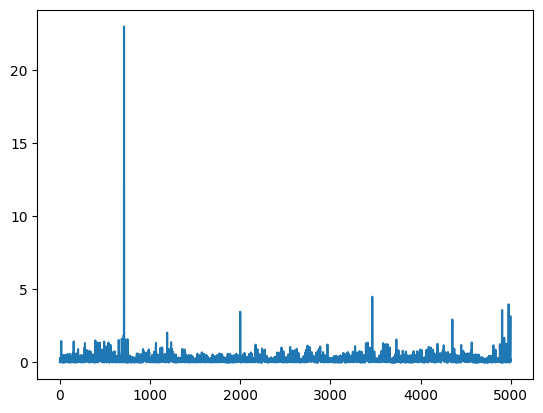

In [ ]:
# @title Linear Regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lin_reg = LinearRegression()
attributes = []
for i in np.arange(cols - 1):
  attributes.append(str(i))
lin_reg.fit(dataTrain[attributes], dataTrain[str(cols - 1)])
print(lin_reg.intercept_, lin_reg.coef_)
predict = lin_reg.predict(dataTest[attributes])
RelErrors = []
RealValues = dataTest[str(cols - 1)].to_numpy()
for i in range(len(predict)):
  val = RealValues[i]
  e = np.abs((predict[i]-val)/val)
  RelErrors.append(e)

plt.plot(RelErrors)
plt.show()


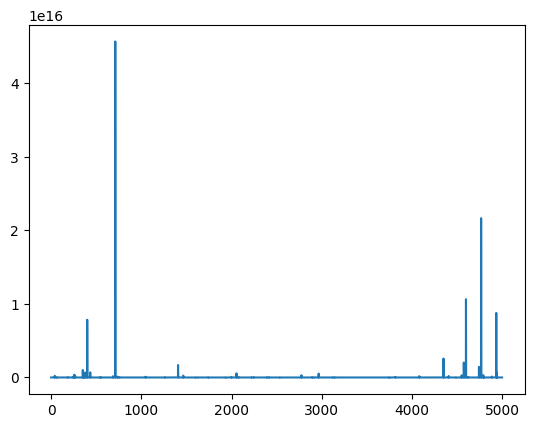

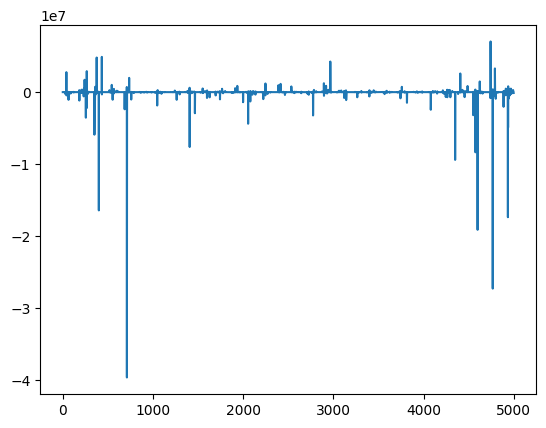

In [ ]:
# @title Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

attributes = []
for i in np.arange(cols - 1):
  attributes.append(str(i))

poly_features = PolynomialFeatures(degree=7, include_bias=False)
dataTrain_poly = poly_features.fit_transform(dataTrain[attributes])

lin_reg = LinearRegression()
lin_reg.fit(dataTrain_poly, dataTrain[str(cols - 1)])

dataTest_poly = poly_features.fit_transform(dataTest[attributes])

predict = lin_reg.predict(dataTest_poly)
RelErrors = np.zeros(len(predict))
RealValues = dataTest[str(cols - 1)].to_numpy()

mult = np.std(RealValues)
eps = 10**(-10)
Inf = 10**(10)
for i in range(len(predict)):
  val = RealValues[i]
  if np.abs(predict[i] - val) < eps:
    RelErrors[i] = 0
  elif mult < eps:
    RelErrors[i] = Inf
  else:
    e = np.abs((predict[i]-val)**2/mult)
    RelErrors[i] = e

plt.plot(RelErrors)
plt.show()
plt.plot(predict)
plt.show()
